<h1 align="center"> Group 1 Project</h1>

## Phase 2
 - Tim, Timi, Chris

## Table of Contents:
* [Prerequisites](#1)
* [Dealing with Null Values](#2)
* [More Cleaning](#3)
* [OneHotEncode our categorical values](#4)
* [Detecting Multicollinearity](#5)
* [Normalize and plot](#6)
* [Train Test Split our data](#7)
* [Modeling and Regression](#9)
* [Residual Analysis](#10)

data understanding and business

---
We have been contracted by a building company newly located in King County, WA. They want to enter the housing market and are unsure of which features of a new house are most important when looking to sell.

---

### Prerequisites <a class="anchor" id="1"></a>

In [1]:
# we start by importing the Python libraries that we will be using:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
plt.rcParams["figure.figsize"] = (13, 10)

In [2]:
df = pd.read_csv('../data/kc_house_data.csv') # load database

df.head() # show first 5 entries

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info() # get a summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

<h1 align="center">Cleaning the Data</h1> 

### Dealing with Null Values <a class="anchor" id="2"></a>

In [4]:
df.isna().sum() # Looking at the number of total null values in our dataframe

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

---
We can see 3 total columns with null values, 2 of which have significantly more than the third. The large number of null values suggest that we should to see if we can fill them in with meaningful data.

---

In [5]:
# looking at the first column with null values
df['waterfront'].value_counts() # see how many houses total are waterfronts

NO     19075
YES      146
Name: waterfront, dtype: int64

---
Judging by the overwhelming amount of non-waterfront houses, it is probably safe to assume a NaN can be filled in by NO.

---

In [6]:
df['waterfront'] = df['waterfront'].fillna(value='NO') # replace all instances of a null value with NO

df.info() # check to see waterfront has no null values remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

---
Next let's take a look at the view category

---


In [7]:
df.view.describe() # take a look at the view column

count     21534
unique        5
top        NONE
freq      19422
Name: view, dtype: object

---
Most of the entries are NONE, and since such a small amount of them are missing it is probably safe to assign the Null values to NONE in this case

---

In [8]:
df['view'] = df['view'].fillna(value='NONE') # replace all instances of a null value with NONE

df.info() # check to see view has no null values remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

---
Finally we need to look at the yr_renovated column

---

In [9]:
df['yr_renovated'].value_counts() # take a look at the year renovated column

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

---
Again, an overwhelming amount of our entries belong to one group, in this case 0.0 indicates a house not being renovated. It is probably safe to assume the remaining values would also be for houses unrenovated considering they are noted when they do recieve the renovations.

---

In [10]:
df['yr_renovated'] = df['yr_renovated'].fillna(value=0.0) # replace all instances of a null value with 0.0
df.info() # check to see yr_renovated has no null values remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### More Cleaning<a class="anchor" id="3"></a>

---
Important possible categories for our stakeholder, including sqft_basement, are objects, but we need to see if we can get them to a more useful format to use in our regression.

---

In [11]:
# sqft_basement is an object while the others are numerical, let's investigate
df['sqft_basement'].unique() # with this we can see all unique entries in this particular column,
                             # maybe a string got entered by accident or something similar

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

---
There appears to be instances of a question mark which we should remove

---

In [12]:
df = df[df['sqft_basement'] != '?'] # drop all of the rows that have '?' as their value

In [13]:
df['sqft_basement'] = df['sqft_basement'].astype("float") # convert the remaining values as floats from strings

In [14]:
df.info() # confirm our conversion worked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  object 
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21143 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

---
Date also appears to be an object, let's see about that

---

In [15]:
df['date'] # see the formatting of our dates

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21143, dtype: object

In [16]:
# we can split the dates up by year, that should be enough for our stakeholder
df['date'] = [x[-4:] for x in df['date']]

df['date'] = df['date'].astype("int64")

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21143 non-null  int64  
 1   date           21143 non-null  int64  
 2   price          21143 non-null  float64
 3   bedrooms       21143 non-null  int64  
 4   bathrooms      21143 non-null  float64
 5   sqft_living    21143 non-null  int64  
 6   sqft_lot       21143 non-null  int64  
 7   floors         21143 non-null  float64
 8   waterfront     21143 non-null  object 
 9   view           21143 non-null  object 
 10  condition      21143 non-null  object 
 11  grade          21143 non-null  object 
 12  sqft_above     21143 non-null  int64  
 13  sqft_basement  21143 non-null  float64
 14  yr_built       21143 non-null  int64  
 15  yr_renovated   21143 non-null  float64
 16  zipcode        21143 non-null  int64  
 17  lat            21143 non-null  float64
 18  long  

In [17]:
df['waterfront'].value_counts()

NO     21001
YES      142
Name: waterfront, dtype: int64

---
Waterfront appears to be boolean, we should convert it to a string so we can onehotencode it later

---

In [18]:
df['waterfront'] = df['waterfront'].astype(str) # turn our booleans into strings so we can onehotencode

---
ID is used to identify existing houses, which is irrelevant moving forward for you.

---

In [19]:
df = df.drop(['id'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21143 non-null  int64  
 1   price          21143 non-null  float64
 2   bedrooms       21143 non-null  int64  
 3   bathrooms      21143 non-null  float64
 4   sqft_living    21143 non-null  int64  
 5   sqft_lot       21143 non-null  int64  
 6   floors         21143 non-null  float64
 7   waterfront     21143 non-null  object 
 8   view           21143 non-null  object 
 9   condition      21143 non-null  object 
 10  grade          21143 non-null  object 
 11  sqft_above     21143 non-null  int64  
 12  sqft_basement  21143 non-null  float64
 13  yr_built       21143 non-null  int64  
 14  yr_renovated   21143 non-null  float64
 15  zipcode        21143 non-null  int64  
 16  lat            21143 non-null  float64
 17  long           21143 non-null  float64
 18  sqft_l

### OneHotEncode our categorical values <a class="anchor" id="4"></a>

We should check the status of our columns

In [20]:
print(df['view'].value_counts())
print(df['condition'].value_counts())
print(df['grade'].value_counts())
print(df['waterfront'].value_counts())

NONE         19079
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64
Average      13726
Good          5557
Very Good     1666
Fair           166
Poor            28
Name: condition, dtype: int64
7 Average        8788
8 Good           5933
9 Better         2557
6 Low Average    1997
10 Very Good     1112
11 Excellent      391
5 Fair            235
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64
NO     21001
YES      142
Name: waterfront, dtype: int64


---
Because our data is both ranked and categorical, we will need to use OrdinalEncode and OneHotEncode

---

In [21]:
df_enc = df.copy() # initialize new dataframe to work with

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder # import OHE and OE
oe = OrdinalEncoder() # initialize OE
ohe = OneHotEncoder(sparse=False) # initialize OHE
df_enc['view'] = oe.fit_transform(df_enc[['view']]) # ordinally encode our view data
df_enc['condition'] = oe.fit_transform(df_enc[['condition']]) # ordinally encode our condition data
df_enc['grade'] = oe.fit_transform(df_enc[['grade']]) # ordinally encode our grade data
df_enc['waterfront'] = ohe.fit_transform(df_enc[['waterfront']]) # onehotencode our waterfront data

In [22]:
print(df_enc.view.value_counts()) # print out newly encoded categories
print(df_enc.condition.value_counts())
print(df_enc.grade.value_counts())
print(df_enc.waterfront.value_counts())

4.0    19079
0.0      930
3.0      496
2.0      327
1.0      311
Name: view, dtype: int64
0.0    13726
2.0     5557
4.0     1666
1.0      166
3.0       28
Name: condition, dtype: int64
8.0     8788
9.0     5933
10.0    2557
7.0     1997
0.0     1112
1.0      391
6.0      235
2.0       89
5.0       27
3.0       13
4.0        1
Name: grade, dtype: int64
1.0    21001
0.0      142
Name: waterfront, dtype: int64


---
Great! Now all of our categorical data is represented numerically and can be included in our model!

---

In [23]:
df_enc.info() # confirm view and condition are now numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21143 non-null  int64  
 1   price          21143 non-null  float64
 2   bedrooms       21143 non-null  int64  
 3   bathrooms      21143 non-null  float64
 4   sqft_living    21143 non-null  int64  
 5   sqft_lot       21143 non-null  int64  
 6   floors         21143 non-null  float64
 7   waterfront     21143 non-null  float64
 8   view           21143 non-null  float64
 9   condition      21143 non-null  float64
 10  grade          21143 non-null  float64
 11  sqft_above     21143 non-null  int64  
 12  sqft_basement  21143 non-null  float64
 13  yr_built       21143 non-null  int64  
 14  yr_renovated   21143 non-null  float64
 15  zipcode        21143 non-null  int64  
 16  lat            21143 non-null  float64
 17  long           21143 non-null  float64
 18  sqft_l

---
### SUCCESS! Now we have a clean dataset to work with

---

### Detecting Multicollinearity <a class="anchor" id="5"></a>

''

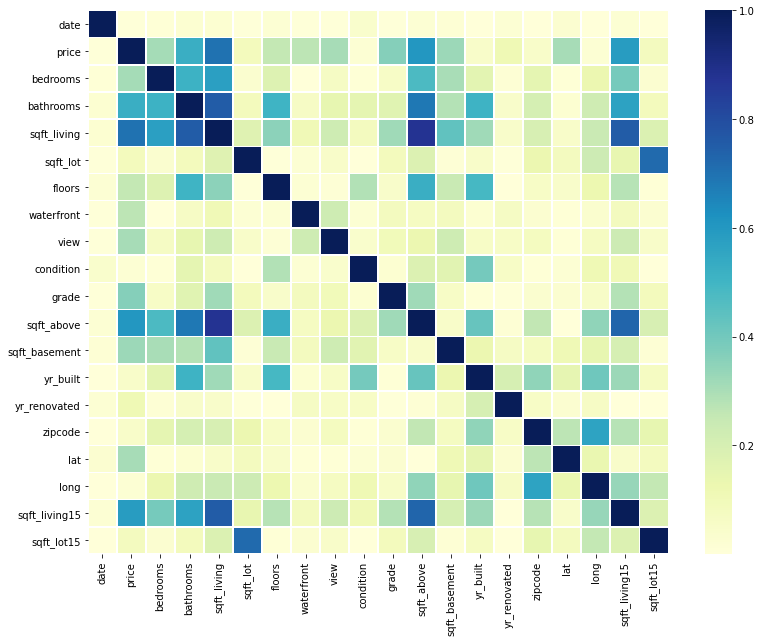

In [24]:
sns.heatmap(df_enc.corr().abs(), cmap="YlGnBu", linewidths=.5) # run a heatmap to detect possible collinearity
;

---
There are some areas of interest and possible multicollinearity in several of our columns, indicated by the darker regions on the above heatmap

---

In [25]:
df_enc.describe() # scan our new data for outliers

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,2014.323417,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.993284,3.725536,0.852670,7.823251,1789.069006,291.851724,1971.023223,68.256492,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,0.467791,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.081679,0.919889,1.266833,2.307302,828.409769,442.498337,29.321938,362.765827,53.535756,0.138591,0.140597,685.67034,27169.273663
min,2014.000000,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2014.000000,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,1.000000,4.000000,0.000000,8.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,2014.000000,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,1.000000,4.000000,0.000000,8.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,2015.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,1.000000,4.000000,2.000000,9.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,2015.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,4.000000,10.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


In [26]:
# one of our houses appears to have 33 bedrooms, let's look into that
df_enc['bedrooms'].sort_values(ascending = False).head()

15856    33
8748     11
15147    10
19239    10
13301    10
Name: bedrooms, dtype: int64

In [27]:
df_enc.loc[[15856]] # inspect our first outlier

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014,640000.0,33,1.75,1620,6000,1.0,1.0,4.0,4.0,8.0,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


---
The amount of bedrooms appears to betray the square footing on this property. The others at 11 and 10 make sense due to the wealthiness of this counties inhabitants.

---

In [28]:
# it would seem safe to drop our highest outlier in this case
df_enc = df_enc[df_enc.bedrooms <= 11] # drop the outlier row

### Normalize and plot <a class="anchor" id="6"></a>

---
In order to further model our data we need to remove some columns, as they provide no useful mathematical correlation

---

In [29]:
df_enc = df_enc.drop(columns=["date"]).copy() # date is no longer relevant so we drop it and create a new dataframe
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21142 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21142 non-null  float64
 1   bedrooms       21142 non-null  int64  
 2   bathrooms      21142 non-null  float64
 3   sqft_living    21142 non-null  int64  
 4   sqft_lot       21142 non-null  int64  
 5   floors         21142 non-null  float64
 6   waterfront     21142 non-null  float64
 7   view           21142 non-null  float64
 8   condition      21142 non-null  float64
 9   grade          21142 non-null  float64
 10  sqft_above     21142 non-null  int64  
 11  sqft_basement  21142 non-null  float64
 12  yr_built       21142 non-null  int64  
 13  yr_renovated   21142 non-null  float64
 14  zipcode        21142 non-null  int64  
 15  lat            21142 non-null  float64
 16  long           21142 non-null  float64
 17  sqft_living15  21142 non-null  int64  
 18  sqft_l

### Train Test Split our data <a class="anchor" id="7"></a>

In [30]:
from sklearn.model_selection import train_test_split
X = df_enc.copy().drop(columns='price')
y = df_enc['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # initialize a linear regression
lr.fit(X_train, y_train) # fit the model on the training set
lr.score(X_train, y_train) # show the r squared value for our data


0.6786424346771143

---
An r-squared score of 0.679 is pretty good! let's try our test data now

---

In [32]:
lr.score(X_test, y_test)

0.6822386223166346

---
Even better! Now let's join price and the rest of the columns back into a single place now that they have been Train Tested. This will make our modeling way easier.

---

In [33]:
df_train = pd.concat([X_train, y_train], axis=1) # join both train and test into respective dataframes
df_test = pd.concat([X_test, y_test], axis=1)

In [34]:
df_train.head() # check and see if price is included with the rest

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
19157,2,1.75,3050,50965,2.0,1.0,4.0,0.0,0.0,3050,0.0,1991,0.0,98053,47.6744,-122.050,3050,40107,890000.0
5412,3,1.75,2160,8565,1.0,1.0,4.0,0.0,9.0,1730,430.0,1971,0.0,98028,47.7664,-122.262,2910,9570,433000.0
10624,3,2.50,2530,13446,2.0,1.0,4.0,0.0,10.0,2530,0.0,1993,0.0,98019,47.7345,-121.961,2450,13446,435000.0
3114,3,3.00,2990,30869,2.0,1.0,4.0,0.0,0.0,2990,0.0,1951,2003.0,98155,47.7602,-122.278,1750,15802,900000.0
11252,3,1.75,2060,3500,1.0,1.0,4.0,4.0,8.0,1030,1030.0,1951,0.0,98118,47.5635,-122.282,1110,6000,499950.0


In [35]:
from sklearn.preprocessing import StandardScaler # import our scaler
ss = StandardScaler() # initialize scaler
df_scale_train = pd.DataFrame(ss.fit_transform(df_train), columns = df_train.columns)  # fit and transform our data as well as making sure our
                                                                        # columns keep their original names
df_scale_train.head() # check out our new dataframe

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,-1.508695,-0.474040,1.051216,0.865170,0.936561,0.082378,0.300207,-0.672132,-3.358318,1.525224,-0.658551,0.683062,-0.186918,-0.473827,0.820960,1.161206,1.548812,1.034973,0.947079
1,-0.404417,-0.474040,0.087070,-0.156186,-0.919659,0.082378,0.300207,-0.672132,0.512773,-0.068977,0.309533,0.001344,-0.186918,-0.940940,1.486300,-0.337049,1.345256,-0.119299,-0.291770
2,-0.404417,0.496712,0.487895,-0.038609,0.936561,0.082378,0.300207,-0.672132,0.942895,0.897205,-0.658551,0.751234,-0.186918,-1.109101,1.255600,1.790191,0.676431,0.027211,-0.286348
3,-0.404417,1.143880,0.986217,0.381086,0.936561,0.082378,0.300207,-0.672132,-3.358318,1.452760,-0.658551,-0.680374,5.368691,1.431995,1.441462,-0.450125,-0.341347,0.116265,0.974187
4,-0.404417,-0.474040,-0.021260,-0.278194,-0.919659,0.082378,0.300207,2.472696,0.082652,-0.914386,1.660348,-0.680374,-0.186918,0.740668,0.018937,-0.478394,-1.271887,-0.254241,-0.110280


In [36]:
df_scale_train.describe() # get quick summary stats for our data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04,1.691300e+04
mean,-5.167431e-17,7.772152e-17,-5.377489e-17,-6.459288e-18,-4.159152e-17,-6.335354e-16,-2.112135e-16,-2.158348e-17,1.546028e-16,-8.528361e-17,1.491413e-17,2.069073e-16,3.003832e-17,-1.057013e-14,-1.109359e-14,-1.325089e-13,-1.134314e-16,-2.331646e-17,-1.310763e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.612973e+00,-2.091960e+00,-1.852053e+00,-3.487257e-01,-9.196589e-01,-1.213918e+01,-4.045017e+00,-6.721319e-01,-3.358318e+00,-1.711486e+00,-6.585513e-01,-2.418755e+00,-1.869185e-01,-1.445422e+00,-2.928807e+00,-2.153331e+00,-2.305659e+00,-4.564289e-01,-1.254114e+00
25%,-4.044167e-01,-4.740402e-01,-7.145784e-01,-2.410256e-01,-9.196589e-01,8.237790e-02,3.002066e-01,-6.721319e-01,8.265206e-02,-7.211494e-01,-6.585513e-01,-6.803739e-01,-1.869185e-01,-8.475173e-01,-6.362784e-01,-8.176219e-01,-7.339188e-01,-2.882606e-01,-5.913162e-01
50%,-4.044167e-01,1.731279e-01,-1.837569e-01,-1.793106e-01,8.450831e-03,8.237790e-02,3.002066e-01,-6.721319e-01,8.265206e-02,-2.742902e-01,-6.585513e-01,1.376879e-01,-1.869185e-01,-2.496124e-01,8.330091e-02,-1.250321e-01,-2.104901e-01,-1.928179e-01,-2.456855e-01
75%,6.998616e-01,4.967119e-01,5.095611e-01,-1.058405e-01,9.365605e-01,8.237790e-02,3.002066e-01,9.002821e-01,5.127734e-01,5.107326e-01,6.022097e-01,8.534919e-01,-1.869185e-01,7.406676e-01,8.506110e-01,6.311629e-01,5.455736e-01,-1.000210e-01,2.829261e-01
max,8.429810e+00,7.615561e+00,1.241513e+01,3.941640e+01,3.720890e+00,8.237790e-02,3.002066e-01,2.472696e+00,9.428947e-01,9.206371e+00,1.019300e+01,1.501124e+00,5.401975e+00,2.254114e+00,1.567298e+00,6.355630e+00,5.997956e+00,2.070979e+01,1.940782e+01


''

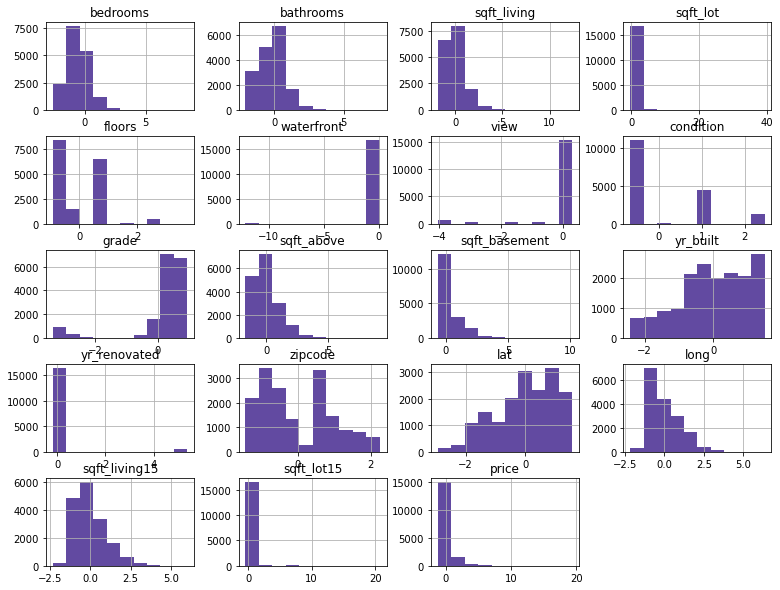

In [37]:
df_scale_train.hist(color='#624aa1')
;

---
It would appear most of our data is skewed. It is significant to also point out they are more often than not skewed positively.

---

### Modeling and Regression <a class="anchor" id="9"></a>

In [38]:
formula='price ~' + ' + '.join(df_train.columns.drop('price'))

mod = smf.ols(formula=formula, data=df_train)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     2099.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:13:58   Log-Likelihood:            -2.3119e+05
No. Observations:               16913   AIC:                         4.624e+05
Df Residuals:                   16895   BIC:                         4.626e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.703e+06   3.42e+06     -1.666

In [39]:
column_names = df_train.describe().columns

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value']]

for idx, value in enumerate(column_names):
    print("price~" + value) # labeling our results with their respective values
    f = 'price~' + value # initialize our formula
    model = smf.ols(formula=f, data=df_train).fit() # fitting our line
    results.append([value, model.rsquared, model.params[0], model.params[1], model.pvalues[1]]) # add each values data to our results
    print(results[idx+1]) # view our results
    print(model.summary()) # shows the regression diagnostics summary

price~bedrooms
['bedrooms', 0.1011987444516711, 104409.30404886109, 129587.76427768721, 0.0]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1904.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:13:58   Log-Likelihood:            -2.3989e+05
No. Observations:               16913   AIC:                         4.798e+05
Df Residuals:                   16911   BIC:                         4.798e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

['yr_renovated', 0.013095150245107434, 532740.6395346577, 117.08571416693415, 2.099115286621653e-50]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     224.4
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           2.10e-50
Time:                        18:13:58   Log-Likelihood:            -2.4068e+05
No. Observations:               16913   AIC:                         4.814e+05
Df Residuals:                   16911   BIC:                         4.814e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [40]:
pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value
1,bedrooms,0.101199,104409,129588,0
2,bathrooms,0.276232,9566.32,250947,0
3,sqft_living,0.495878,-44594,281.409,0
4,sqft_lot,0.00639272,529939,0.71048,2.14067e-25
5,floors,0.0661711,277221,176141,9.38143e-254
6,waterfront,0.0702625,1.72763e+06,-1.19505e+06,6.83795e-270
7,view,0.0896031,987294,-119953,0
8,condition,0.000338335,536071,5334.68,0.01675
9,grade,0.141044,1.00589e+06,-59589,0


---

Our r-squared data here indicates the percentage of the variance in our target variable (price).

The three most relevant categories from here seem to be bathrooms, the foot^2 of living area, and the grade

---

---
Let's run another model, cutting out some columns with lower variance in relation to the price of homes.

---

In [41]:
formula2='price ~ bathrooms + sqft_living + sqft_above'

mod = smf.ols(formula=formula2, data=df_train)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     5560.
Date:                Thu, 17 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:13:58   Log-Likelihood:            -2.3499e+05
No. Observations:               16913   AIC:                         4.700e+05
Df Residuals:                   16909   BIC:                         4.700e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.562e+04   5916.501     -6.020      

### Residual Analysis <a class="anchor" id="10"></a>